In [ ]:
# Liz's Code for Regions

In [65]:
import pandas as pd
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [66]:
# Load enigma dataset.
usa = pd.read_csv('enigma_Aug_8_2020.csv')
usa.head(4)

,state_fips,state_name,lat,long,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
0,36,New York,42.913397,-75.596272,7/1/2020,398770,31791,394079.0,3577569.0,NaN,3971648.0,226.0,879.0,139.0,70590.0
1,36,New York,42.913397,-75.596272,7/2/2020,399642,31814,394954.0,3646639.0,NaN,4041593.0,209.0,878.0,129.0,70698.0
2,36,New York,42.913397,-75.596272,7/3/2020,400561,31836,395872.0,3712113.0,NaN,4107985.0,188.0,857.0,125.0,70794.0
3,36,New York,42.913397,-75.596272,7/4/2020,401286,31860,396598.0,3773790.0,NaN,4170388.0,190.0,844.0,119.0,70877.0


In [13]:
# first datetime conversion
usa['datetime'] = pd.to_datetime(usa['date'])

In [14]:
# remove uneeded columns
# drop unneeded colums
usa = usa.drop(columns = ["state_fips", "lat", "long"])


# New Englend Divsion 1
# North East Region

In [5]:
# Created DF based New Englend Divsion
new_englend = usa[(usa['state_name']=="Connecticut") | (usa['state_name'] == 'Maine') |
                      (usa['state_name'] == 'Massachusetts') | (usa['state_name'] == 'New Hampshire') | \
                     (usa['state_name']=='Rhode Island')| (usa['state_name'] =='Vermont')]
new_englend.head()

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime
900,Rhode Island,3/1/2020,2,0,2.0,2.0,NaN,4.0,NaN,NaN,NaN,NaN,2020-03-01
901,Rhode Island,3/2/2020,2,0,2.0,3.0,NaN,5.0,NaN,NaN,NaN,NaN,2020-03-02
902,Rhode Island,3/3/2020,2,0,2.0,5.0,NaN,7.0,NaN,NaN,NaN,NaN,2020-03-03
903,Rhode Island,3/4/2020,2,0,2.0,15.0,NaN,17.0,NaN,NaN,NaN,NaN,2020-03-04
904,Rhode Island,3/5/2020,2,0,3.0,19.0,NaN,22.0,NaN,NaN,NaN,NaN,2020-03-05


# Fucntion for Making Regions-works except for when it is called it is not printing out in the right form.

In [6]:
def make_region(df):
    '''function to make regions'''
    df = df.groupby(["datetime"]).sum()
    df.sort_values(by = "datetime")
    df=df.reset_index()
    df['datetime'] = pd.to_datetime(df['datetime'])
    df["day"] = df['datetime'].map(lambda x: x.day)
    df["month"] = df['datetime'].map(lambda x: x.month)
    df["year"] = df['datetime'].map(lambda x: x.year)
    print(df.head())

make_region(new_englend)

    datetime  cases  deaths  tests_positive  tests_negative  tests_pending  \
0 2020-02-01      1       0             0.0             0.0            0.0   
1 2020-02-02      1       0             0.0             0.0            0.0   
2 2020-02-03      1       0             0.0             0.0            0.0   
3 2020-02-04      1       0             0.0             0.0            0.0   
4 2020-02-05      1       0             0.0             0.0            0.0   

   tests  patients_icu  patients_hosp  patients_vent  recovered  day  month  \
0    0.0           0.0            0.0            0.0        0.0    1      2   
1    0.0           0.0            0.0            0.0        0.0    2      2   
2    0.0           0.0            0.0            0.0        0.0    3      2   
3    0.0           0.0            0.0            0.0        0.0    4      2   
4    0.0           0.0            0.0            0.0        0.0    5      2   

   year  
0  2020  
1  2020  
2  2020  
3  2020  
4  202

# CODE for NEW Englend Divsion

In [7]:
# Summing case count for New Englend
# Groupby to consolidate cases by entire region
new_englend = new_englend.groupby(["datetime"]).sum()

# sort by datetime and reset index
new_englend.sort_values(by ="datetime")
new_englend= new_englend.reset_index()

# now finsh date time conversion

new_englend['datetime'] = pd.to_datetime(new_englend['datetime'])
new_englend["day"] = new_englend['datetime'].map(lambda x: x.day)
new_englend["month"] = new_englend['datetime'].map(lambda x: x.month)
new_englend["year"] = new_englend['datetime'].map(lambda x: x.year)


# now create new column for growth rate
new_englend['growth_rate'] = new_englend['cases'].pct_change()
new_englend.head(1)


,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,day,month,year,growth_rate
0,2020-02-01,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,2020,NaN


# Sum Stats on New Englend Growth Rates 

In [8]:
new_englend['growth_rate'].describe()

count    178.000000
mean       0.084077
std        0.211686
min        0.000000
25%        0.002152
50%        0.006921
75%        0.064779
max        2.000000
Name: growth_rate, dtype: float64

# Visulize Growth Rate and Cases

Text(0.5, 1.0, 'New Englend Growth Rate')

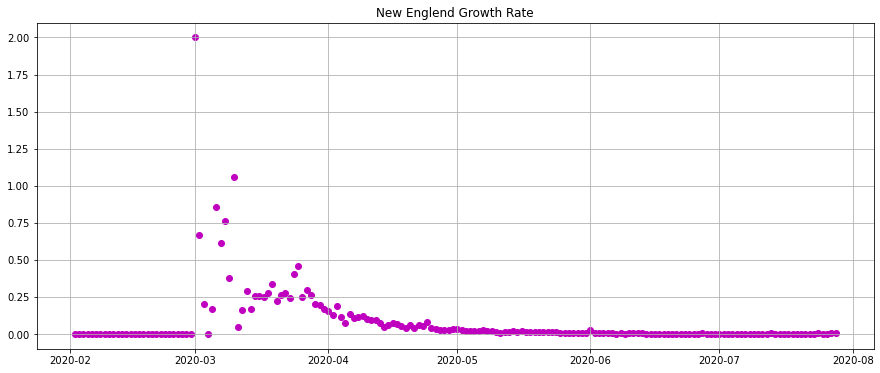

In [12]:
plt.figure(figsize = (15, 6))
plt.scatter(new_englend["datetime"],new_englend["growth_rate"],c='m',)
plt.grid(True)
plt.title("New Englend Growth Rate")

Text(0.5, 1.0, 'New Englend Cases')

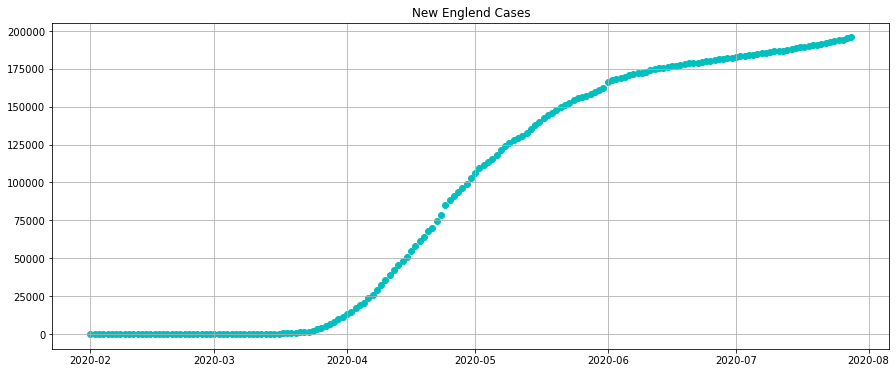

In [11]:
plt.figure(figsize = (15, 6))
plt.scatter(new_englend["datetime"],new_englend["cases"],c='c',)
plt.grid(True)
plt.title("New Englend Cases")

# WEST NORTH CENTRAL

In [18]:
# Creat DF for just West North Central
west_northern_central =  usa[(usa['state_name']=='Iowa') | (usa['state_name'] == 'Kansas') |
                      (usa['state_name'] == 'Minnesota') | (usa['state_name'] == 'Missouri') | 
                     (usa['state_name']=='North Dakota') | (usa['state_name']=='South Dakota')] 



# Summing case count for Western Northern Central
# Groupby to consolidate cases by entire region

wnc_group = west_northern_central.groupby(["datetime"]).sum()


# Sort by datetime and reset index
wnc_group.sort_values(by = 'datetime')
wnc_group = wnc_group.reset_index()

# Finish datetime conversion
wnc_group['datetime'] = pd.to_datetime(wnc_group['datetime'])
wnc_group['day'] = wnc_group['datetime'].map(lambda x: x.day)
wnc_group['month'] = wnc_group['datetime'].map(lambda x: x.month)
wnc_group['year'] = wnc_group['datetime'].map(lambda x: x.year)

# Now create new column for growth rate
wnc_group['growth_rate'] = wnc_group['cases'].pct_change()
wnc_group.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,day,month,year,growth_rate
140,2020-07-24,171407,4208,169034.0,2332495.0,0.0,2501529.0,278.0,1647.0,210.0,84981.0,24,7,2020,0.022483
141,2020-07-25,174036,4219,171821.0,2362999.0,0.0,2534820.0,285.0,1964.0,211.0,86157.0,25,7,2020,0.015338
142,2020-07-26,176951,4235,174660.0,2391636.0,0.0,2566296.0,290.0,1961.0,212.0,87249.0,26,7,2020,0.016749
143,2020-07-27,180225,4261,178009.0,2423595.0,0.0,2601604.0,262.0,1857.0,215.0,88412.0,27,7,2020,0.018502
144,2020-07-28,182605,4293,177964.0,2448856.0,0.0,2626820.0,271.0,1640.0,167.0,90149.0,28,7,2020,0.013206


In [24]:
# rolling average

wnc_group['rolling_ave'] = wnc_group['cases'].rolling(7).mean()
wnc_group.sample(5)

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,day,month,year,growth_rate,rolling_ave
117,2020-07-01,114558,3710,113525.0,1574454.0,0.0,1687979.0,162.0,1086.0,96.0,65531.0,1,7,2020,0.016099,109670.857143
56,2020-05-01,29595,1076,32536.0,261353.0,0.0,293889.0,239.0,1693.0,228.0,7258.0,1,5,2020,0.069725,25057.285714
59,2020-05-04,34990,1203,37830.0,299764.0,0.0,337594.0,309.0,1743.0,228.0,9931.0,4,5,2020,0.051256,29723.142857
38,2020-04-13,10330,328,10685.0,127765.0,0.0,138450.0,144.0,1300.0,41.0,1847.0,13,4,2020,0.060357,8510.571429
95,2020-06-09,85414,3092,86089.0,986456.0,0.0,1072545.0,281.0,1365.0,110.0,45190.0,9,6,2020,0.009825,82211.857143


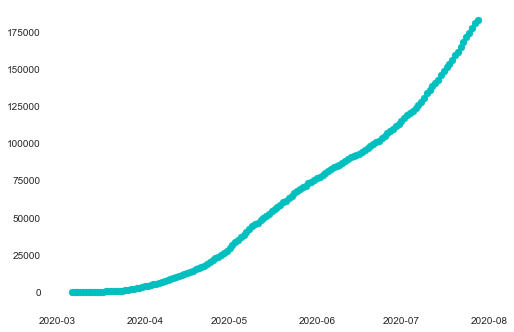

In [26]:
 plt.scatter(wnc_group["datetime"],wnc_group["cases"],c='c',label='us')

In [36]:
wnc_group= wnc_group.dropna()
wnc_group.dtypes

datetime          datetime64[ns]
cases                      int64
deaths                     int64
tests_positive           float64
tests_negative           float64
tests_pending            float64
tests                    float64
patients_icu             float64
patients_hosp            float64
patients_vent            float64
recovered                float64
day                        int64
month                      int64
year                       int64
growth_rate              float64
rolling_ave              float64
dtype: object

In [40]:
wnc_group = wnc_group[['tests_positive','tests_negative','tests_pending','tests','patients_icu', 'patients_hosp','patients_vent','recovered','growth_rate','rolling_ave']].astype('int')

In [28]:
from pandas_profiling import ProfileReport

In [43]:
profile = ProfileReport(wnc_group, title="Pandas Profiling Report")
profile

profile.to_file("west_north_central.html")

In [49]:
# Create DF for just Minneosta
minnesota = usa[usa['state_name']=='Minnesota']
minnesota

# now create new column for growth rate
minnesota['growth_rate'] = minnesota['cases'].pct_change()
minnesota.head(10)

<ipython-input-49-97e0736feb9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minnesota['growth_rate'] = minnesota['cases'].pct_change()


,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime,growth_rate
6720,Minnesota,3/6/2020,1,0,1.0,36.0,NaN,37.0,NaN,NaN,NaN,NaN,2020-03-06,NaN
6721,Minnesota,3/7/2020,1,0,2.0,48.0,NaN,50.0,NaN,NaN,NaN,NaN,2020-03-07,0.000000
6722,Minnesota,3/8/2020,2,0,2.0,48.0,NaN,50.0,NaN,NaN,NaN,NaN,2020-03-08,1.000000
6723,Minnesota,3/9/2020,2,0,5.0,80.0,NaN,85.0,NaN,NaN,NaN,NaN,2020-03-09,0.000000
6724,Minnesota,3/10/2020,3,0,11.0,132.0,NaN,143.0,NaN,NaN,NaN,NaN,2020-03-10,0.500000
6725,Minnesota,3/11/2020,5,0,21.0,217.0,NaN,238.0,NaN,NaN,NaN,NaN,2020-03-11,0.666667
6726,Minnesota,3/12/2020,9,0,43.0,307.0,NaN,350.0,NaN,NaN,NaN,NaN,2020-03-12,0.800000
6727,Minnesota,3/13/2020,14,0,62.0,541.0,NaN,603.0,NaN,NaN,NaN,NaN,2020-03-13,0.555556
6728,Minnesota,3/14/2020,21,0,90.0,847.0,NaN,937.0,NaN,NaN,NaN,NaN,2020-03-14,0.500000
6729,Minnesota,3/15/2020,35,0,128.0,1387.0,NaN,1515.0,NaN,NaN,NaN,NaN,2020-03-15,0.666667


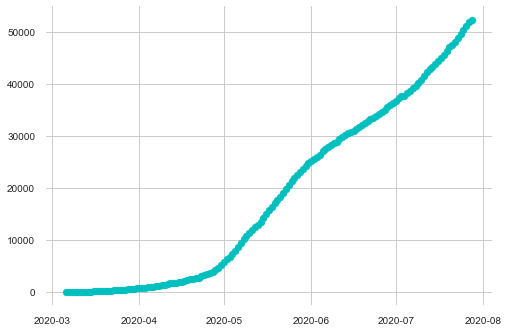

In [47]:
plt.scatter(minnesota["datetime"],minnesota["cases"],c='c',label='us')
plt.grid(True)

# Breakout States

In [62]:
# Create DF just for Iowa

Iowa= usa[usa['state_name']=='Iowa']

# now create new column for growth rate
Iowa['growth_rate'] = Iowa['cases'].pct_change()
Iowa.head(5)

<ipython-input-62-49a8a069e780>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Iowa['growth_rate'] = Iowa['cases'].pct_change()


,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime,growth_rate
5541,Iowa,3/8/2020,3,0,0.0,15.0,2.0,15.0,NaN,NaN,NaN,NaN,2020-03-08,NaN
5542,Iowa,3/9/2020,8,0,3.0,26.0,8.0,29.0,NaN,NaN,NaN,NaN,2020-03-09,1.666667
5543,Iowa,3/10/2020,13,0,8.0,32.0,11.0,40.0,NaN,NaN,NaN,NaN,2020-03-10,0.625000
5544,Iowa,3/11/2020,14,0,13.0,46.0,27.0,59.0,NaN,NaN,NaN,NaN,2020-03-11,0.076923
5545,Iowa,3/12/2020,16,0,14.0,67.0,24.0,81.0,NaN,NaN,NaN,NaN,2020-03-12,0.142857


In [63]:
# Create DF for just Minneosta
minnesota = usa[usa['state_name']=='Minnesota']
minnesota

# now create new column for growth rate
minnesota['growth_rate'] = minnesota['cases'].pct_change()
minnesota.head(5)

<ipython-input-63-870cbbd34a3d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minnesota['growth_rate'] = minnesota['cases'].pct_change()


,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime,growth_rate
6720,Minnesota,3/6/2020,1,0,1.0,36.0,NaN,37.0,NaN,NaN,NaN,NaN,2020-03-06,NaN
6721,Minnesota,3/7/2020,1,0,2.0,48.0,NaN,50.0,NaN,NaN,NaN,NaN,2020-03-07,0.0
6722,Minnesota,3/8/2020,2,0,2.0,48.0,NaN,50.0,NaN,NaN,NaN,NaN,2020-03-08,1.0
6723,Minnesota,3/9/2020,2,0,5.0,80.0,NaN,85.0,NaN,NaN,NaN,NaN,2020-03-09,0.0
6724,Minnesota,3/10/2020,3,0,11.0,132.0,NaN,143.0,NaN,NaN,NaN,NaN,2020-03-10,0.5


In [64]:
# Create DF for just Kannas
Kansas = usa[usa['state_name']=='Kansas']
# now create new column for growth rate
Kansas['growth_rate'] = Kansas['cases'].pct_change()
Kansas.head(5)

<ipython-input-64-a5360c679364>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kansas['growth_rate'] = Kansas['cases'].pct_change()


,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime,growth_rate
5684,Kansas,3/7/2020,1,0,0.0,11.0,2.0,11.0,NaN,NaN,NaN,NaN,2020-03-07,NaN
5685,Kansas,3/8/2020,1,0,1.0,11.0,0.0,12.0,NaN,NaN,NaN,NaN,2020-03-08,0.0
5686,Kansas,3/9/2020,1,0,1.0,11.0,0.0,12.0,NaN,NaN,NaN,NaN,2020-03-09,0.0
5687,Kansas,3/10/2020,1,0,1.0,17.0,21.0,18.0,NaN,NaN,NaN,NaN,2020-03-10,0.0
5688,Kansas,3/11/2020,1,0,1.0,41.0,NaN,42.0,NaN,NaN,NaN,NaN,2020-03-11,0.0


In [58]:
# Create DF for just Missouri
Missouri = usa[usa['state_name']=='Missouri']
# now create new column for growth rate
Missouri['growth_rate'] = Missouri['cases'].pct_change()
Missouri.head(5)

<ipython-input-58-96c129f815f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Missouri['growth_rate'] = Missouri['cases'].pct_change()


,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime,growth_rate
7005,Missouri,3/7/2020,1,0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2020-03-07,NaN
7006,Missouri,3/8/2020,1,0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-03-08,0.0
7007,Missouri,3/9/2020,1,0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-03-09,0.0
7008,Missouri,3/10/2020,1,0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-03-10,0.0
7009,Missouri,3/11/2020,1,0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-03-11,0.0


In [60]:
# Create DF for just North Dakota
North_Dakota = usa[usa['state_name']=='North Dakota']
# now create new column for growth rate
North_Dakota['growth_rate'] = North_Dakota['cases'].pct_change()
North_Dakota.head(5)

<ipython-input-60-3bca66c59fc4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  North_Dakota['growth_rate'] = North_Dakota['cases'].pct_change()


,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime,growth_rate
176,North Dakota,3/11/2020,1,0,0.0,7.0,6.0,7.0,NaN,NaN,NaN,NaN,2020-03-11,NaN
177,North Dakota,3/12/2020,1,0,1.0,12.0,14.0,13.0,NaN,NaN,NaN,NaN,2020-03-12,0.0
178,North Dakota,3/13/2020,1,0,1.0,39.0,12.0,40.0,NaN,NaN,NaN,NaN,2020-03-13,0.0
179,North Dakota,3/14/2020,1,0,1.0,54.0,14.0,55.0,NaN,NaN,NaN,NaN,2020-03-14,0.0
180,North Dakota,3/15/2020,1,0,1.0,95.0,4.0,96.0,NaN,NaN,NaN,NaN,2020-03-15,0.0


In [59]:
# Create DF for just Kannas
South_Dakota = usa[usa['state_name']=='South Dakota']
# now create new column for growth rate
South_Dakota['growth_rate'] = South_Dakota['cases'].pct_change()
South_Dakota.head(5)

<ipython-input-59-7d2f6f26f35d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  South_Dakota['growth_rate'] = South_Dakota['cases'].pct_change()


,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime,growth_rate
5684,Kansas,3/7/2020,1,0,0.0,11.0,2.0,11.0,NaN,NaN,NaN,NaN,2020-03-07,NaN
5685,Kansas,3/8/2020,1,0,1.0,11.0,0.0,12.0,NaN,NaN,NaN,NaN,2020-03-08,0.0
5686,Kansas,3/9/2020,1,0,1.0,11.0,0.0,12.0,NaN,NaN,NaN,NaN,2020-03-09,0.0
5687,Kansas,3/10/2020,1,0,1.0,17.0,21.0,18.0,NaN,NaN,NaN,NaN,2020-03-10,0.0
5688,Kansas,3/11/2020,1,0,1.0,41.0,NaN,42.0,NaN,NaN,NaN,NaN,2020-03-11,0.0
